<a href="https://colab.research.google.com/github/realover82/AINFT-Lab/blob/master/220623%EA%B0%90%EC%9E%90_ver10-complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd

/root


In [3]:
cd ..

/


In [4]:
cd content/drive/MyDrive/deeplearning

/content/drive/MyDrive/deeplearning


머신러닝 모델 로딩

In [5]:
import numpy as np  
import datetime
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras import Model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [6]:
BATCH_SIZE = 32
COLOR_MODE = 'rgb'
TARGET_SIZE = (255, 255)
GRAY_SCALL = (3,)
INPUT_SIZE = TARGET_SIZE + GRAY_SCALL

def my_model():
  vgg19_model = VGG19(weights='imagenet',include_top=False,input_shape=INPUT_SIZE)
  vgg19_model.trainable = False
  flatten =Flatten()(vgg19_model.layers[-1].output)
  fc1 = Dense(units=4096, activation ='relu')(flatten)
  dropout = Dropout(0.2)(fc1)
  fc2 = Dense(units=1024,activation='relu')(dropout)
  output = Dense(2, activation='softmax')(fc2)
  model = Model(inputs = vgg19_model.input, outputs=output)
  model.summary()
  return model

In [7]:
model = my_model()

80150528/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                              

모델 저장한것 불러오기

In [8]:
model = tf.keras.models.load_model('my_model-p4-8.h5')

불량감자 classes 분류 설정

In [9]:
# -- Data Normalization --
data_generator = ImageDataGenerator(samplewise_center=True, #making sure that each image has a mean of 0
                                    samplewise_std_normalization=True, #and standard deviation 1
                                    horizontal_flip=True, #Randomly flip inputs horizontally
                                    validation_split=0.3,
                                    )

In [12]:
# -- Global Variables -- 
TRAIN_PATH = 'Pepsico RnD Potato Lab Dataset/Train'
TEST_PATH = 'Pepsico RnD Potato Lab Dataset/Test'
BATCH_SIZE = 32
COLOR_MODE = 'rgb'
TARGET_SIZE = (255, 255)
GRAY_SCALL = (3,)
INPUT_SIZE = TARGET_SIZE + GRAY_SCALL
EPOCHS = 2
CLASSES = ['Defective','Non-Defective']

In [13]:
# -- Data iterators -- 
train_data = data_generator.flow_from_directory(directory=TRAIN_PATH,
                                                target_size=TARGET_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                color_mode=COLOR_MODE,
                                                subset='training',
                                                shuffle=True)         
    
validation_data = data_generator.flow_from_directory(directory=TRAIN_PATH,
                                                     target_size=TARGET_SIZE,
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical',
                                                     color_mode=COLOR_MODE,
                                                     subset='validation',
                                                     shuffle=True)             

test_data = data_generator.flow_from_directory(directory=TEST_PATH,
                                               target_size=TARGET_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               color_mode=COLOR_MODE,
                                               shuffle=True)

Found 539 images belonging to 2 classes.
Found 230 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

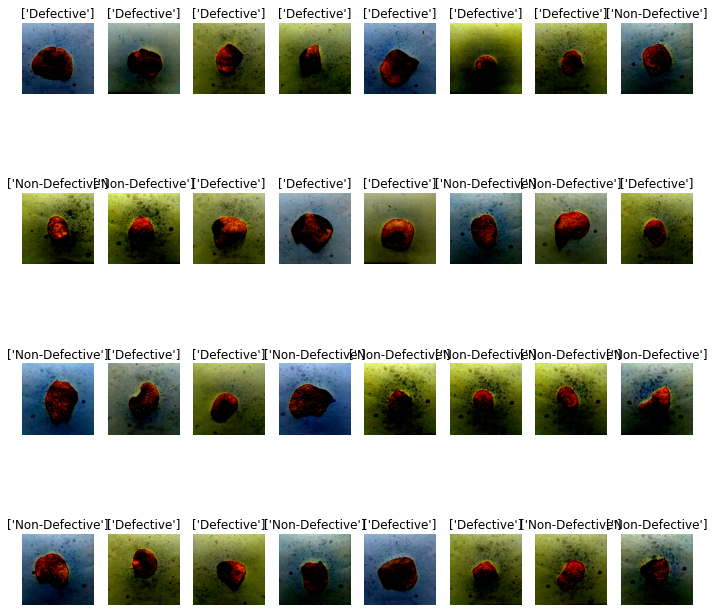

In [17]:
# -- plot random batch -- 
images, labels = train_data.next()
classes = np.asarray(CLASSES)

_, axs = plt.subplots(4, 8, figsize=(12,12))
axs = axs.flatten()
for img, label, ax in zip(images, labels, axs):
    ax.imshow(img)
    ax.axis('off')
    label = label.astype(int)
    ax.set_title(classes[label == 1])
plt.show()

불량감자 테스트

In [18]:

img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
# print(CLASSES)
# print(classes)
print(classes[output[0]!=0])


[[9.999989e-01 1.092035e-06]]
['Defective' 'Non-Defective']


In [19]:

img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548-defect.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
# print(CLASSES)
# print(classes)
print(classes[output[0]!=0])


[[1. 0.]]
['Defective']


머신러닝 학습

In [ ]:
# -- Train model --
history = model.fit(x=train_data, 
                        epochs=EPOCHS, 
                        steps_per_epoch=len(train_data), 
                        verbose=1, 
                        validation_data=validation_data, 
                        validation_steps=1)

In [ ]:
# -- Save model -- 
model.save('my_model-p4-10.h5')

In [ ]:
def learning_curves(history):
    '''plot learning curves'''
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss - Cross Entropy')
    plt.xlabel('epoch')
    plt.ylim([0,1.6])
    plt.title('Training and Validation Loss')
    
    plt.show()

In [ ]:
# -- Plot learning curves -- 
learning_curves(history)